In [1]:
import mplsoccer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17

In [2]:
df1 = pd.read_csv('../passing.csv', index_col='Rk')
df2 = pd.read_csv('../possession.csv', index_col='Rk')
df = pd.merge(df1, df2, on='Player')

In [3]:
df_pos = pd.read_excel('../Player Positions-FBRef format.xlsx')
df = pd.merge(df, df_pos, on='Player')

In [4]:
df = df[df['Position']=='Left-Back']
df = df[df['90s_x']>=5]

Text(0.15, 0.848, 'khatri_shreyas')

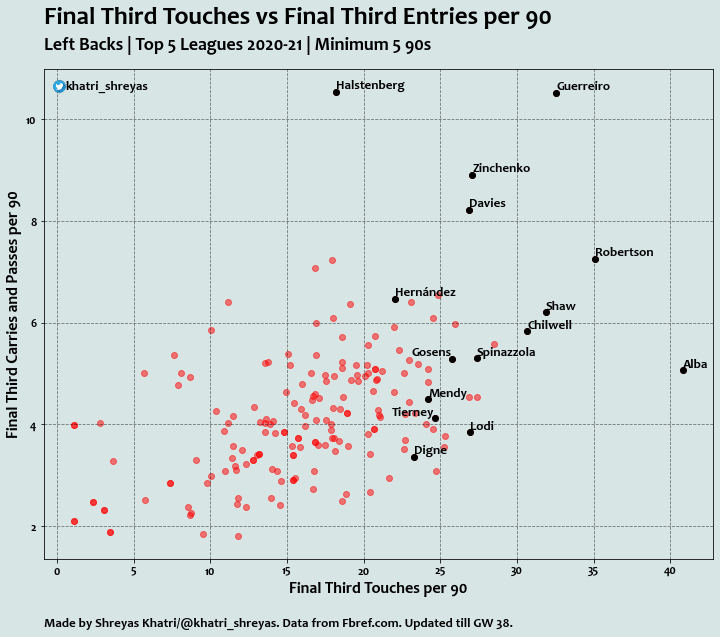

In [5]:
players = ['Leonardo Spinazzola', 'Theo Hernández', 'Luke Shaw', 'Andrew Robertson', 'Raphaël Guerreiro', 
           'Jordi Alba', 'Ben Chilwell', 'Robin Gosens', 'Kieran Tierney', 'Renan Lodi', 'Oleksandr Zinchenko', 
           'Marcel Halstenberg', 'Ferland Mendy', 'Alphonso Davies', 'Lucas Digne']

fig, ax = plt.subplots(figsize=(12,9))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

df_fil = df[df['Player'].apply(lambda x: x in players)]

x, y = (df['Att 3rd']/df['90s_x']).to_list(), (df['1/3_x']+df['1/3_y'])/df['90s_x'].to_list()

ax.grid(True, ls='--', c='black', alpha=0.5)
ax.scatter(x, y, alpha = 0.5, c='red')
ax.scatter(df_fil['Att 3rd']/df_fil['90s_x'], (df_fil['1/3_x']+df_fil['1/3_y'])/df_fil['90s_x'], c='black')

texts = []
for x_pos, y_pos, s in zip(df_fil['Att 3rd']/df_fil['90s_x'], (df_fil['1/3_x']+df_fil['1/3_y'])/df_fil['90s_x'], 
                           df_fil['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    texts.append(plt.text(x_pos, y_pos, name,
                fontdict=dict(color='black', size=13)))
    adjust_text(texts, force_points=0.2, force_text=0.2,
                expand_points=(1, 1.3), expand_text=(1, 1),
                arrowprops=dict(arrowstyle = '-', color='#D7E5E5', lw=0.1, alpha = 0))
    
fig.text(0.125,0.95,'Final Third Touches vs Final Third Entries per 90', size = 25, weight='heavy')
fig.text(0.125,0.91,'Left Backs | Top 5 Leagues 2020-21 | Minimum 5 90s', size = 18, weight='heavy')

fig.text(0.125,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Updated till GW 38.', size=13)

ax.set_xlabel('Final Third Touches per 90', size = 16, weight='bold')
ax.set_ylabel('Final Third Carries and Passes per 90', size = 16, weight='bold')

# TWITTER
ax2 = fig.add_axes([0.13,0.84,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.15,0.848,'khatri_shreyas', size=13, weight='bold')

#plt.savefig('LB_finthird', facecolor=background, dpi=300)